In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = './housing.csv'
df = pd.read_csv(file_path, header=None, delimiter=r"\s+", names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
correlation = df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX', 'MEDV']].corr()
target_corr = correlation['MEDV']
print(target_corr)

LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
NOX       -0.427321
MEDV       1.000000
Name: MEDV, dtype: float64


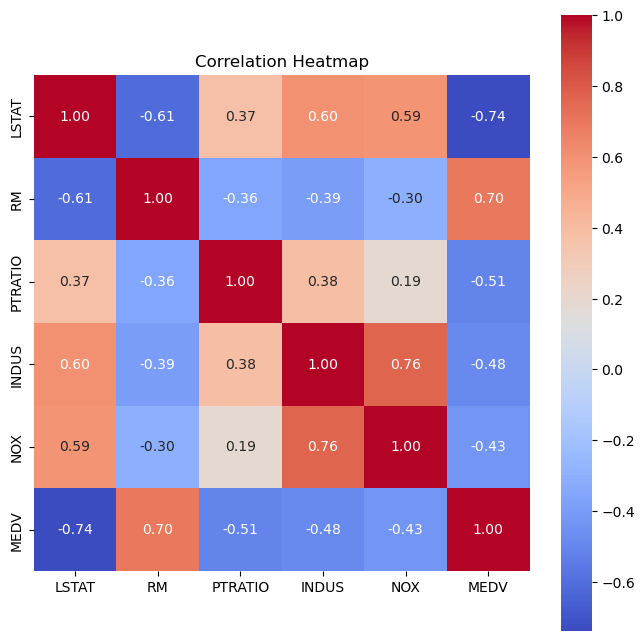

In [6]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

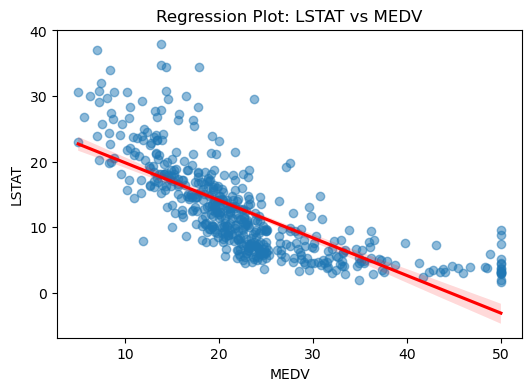

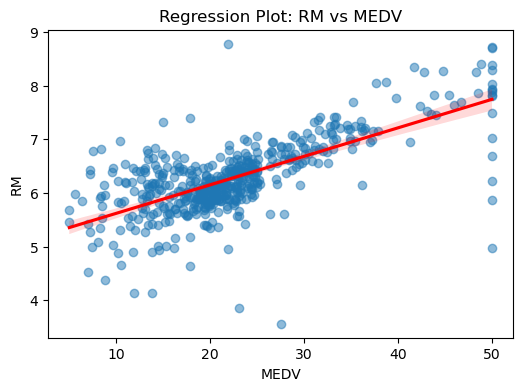

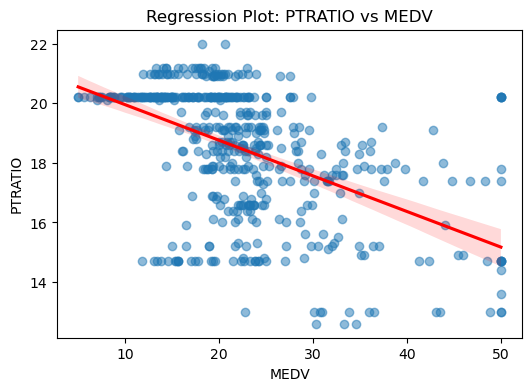

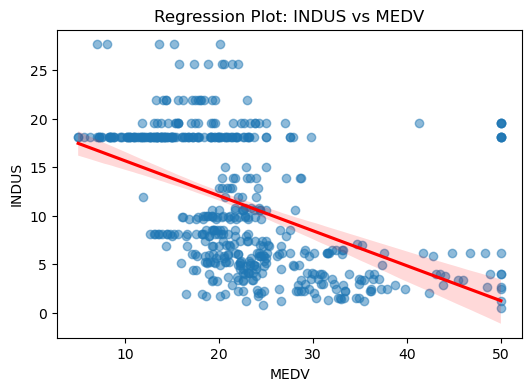

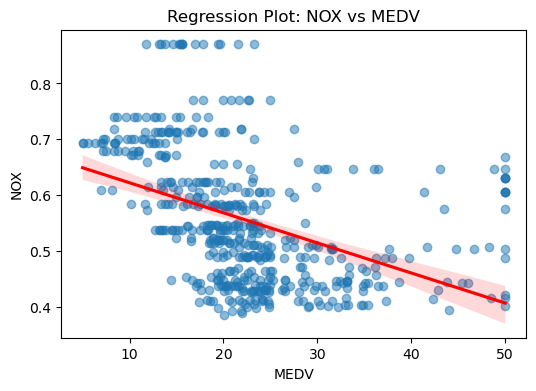

In [7]:
# create a regression plot for LSTAT, RM, PTRATIO, INDUS, NOX vs MEDV
def plot_regression(df, feature):
    plt.figure(figsize=(6, 4))
    sns.regplot(y=feature, x='MEDV', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Regression Plot: {feature} vs MEDV')
    plt.ylabel(feature)
    plt.xlabel('MEDV')
    plt.show()

features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX']
for feature in features:
    plot_regression(df, feature)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

## LR using LSTAT

In [9]:
X0 = df['LSTAT']
y0 = df['MEDV']

In [10]:
scaler = StandardScaler()
X0_scaled = scaler.fit_transform(X0.values.reshape(-1, 1))
X0_train, X0_test, y0_train, y0_test = train_test_split(X0_scaled, y0, test_size=0.2, random_state=42)

In [11]:
model0 = LinearRegression()
model0.fit(X0_train, y0_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y0_pred = model0.predict(X0_test)

In [13]:
mse0 = mean_squared_error(y0_test, y0_pred)
r2_0 = r2_score(y0_test, y0_pred)
print(f'Mean squared error: {mse0}')
print(f'R squared: {r2_0}')

Mean squared error: 33.519549172684876
R squared: 0.5429180422970387


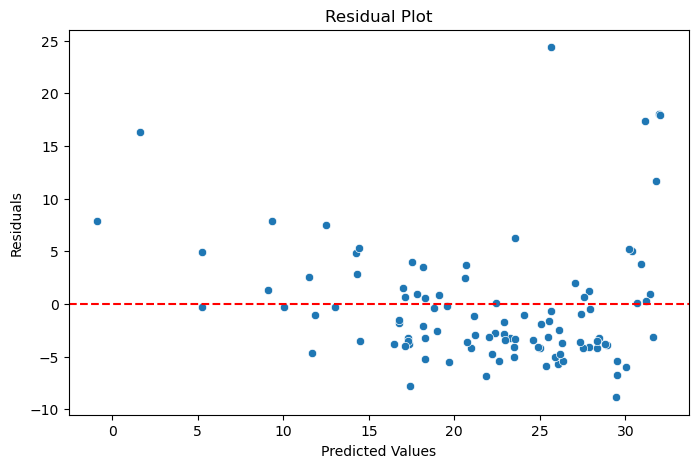

In [14]:
# Create residuals
residuals1 = y0_test - y0_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y0_pred, y=residuals1)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## MLR USING ALL THE FEATURES

In [15]:
X1 = df.drop(['MEDV'], axis = 1)
y1 = df['MEDV']

In [16]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)

In [17]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y1_pred = model1.predict(X1_test)

In [19]:
# Testing the model
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
print(f'Mean squared error: {mse1}')
print(f'R squared: {r2_1}')

Mean squared error: 24.29111947497351
R squared: 0.6687594935356321


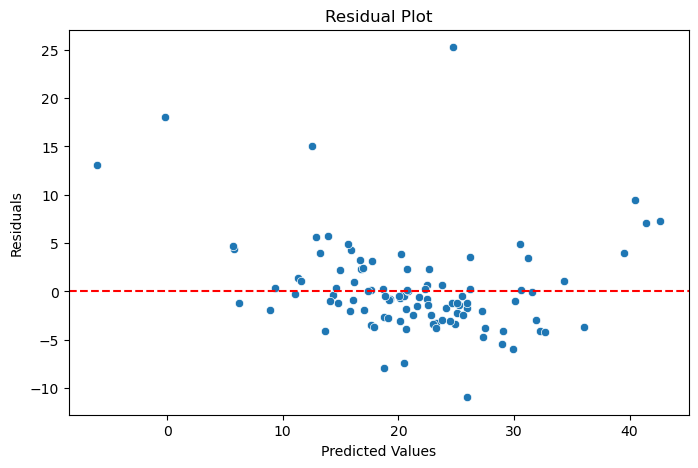

In [20]:
# Create residuals
residuals1 = y1_test - y1_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y1_pred, y=residuals1)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## MLR USING SELECT FEATURES 
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX']

In [21]:
X2 = df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX']]
y2 = df['MEDV']

In [22]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

In [23]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y2_pred = model2.predict(X2_test)

In [25]:
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
print(f'Mean Squared Error: {mse2:.2f}')
print(f'R Squared: {r2_2:.2f}')

Mean Squared Error: 27.17
R Squared: 0.63


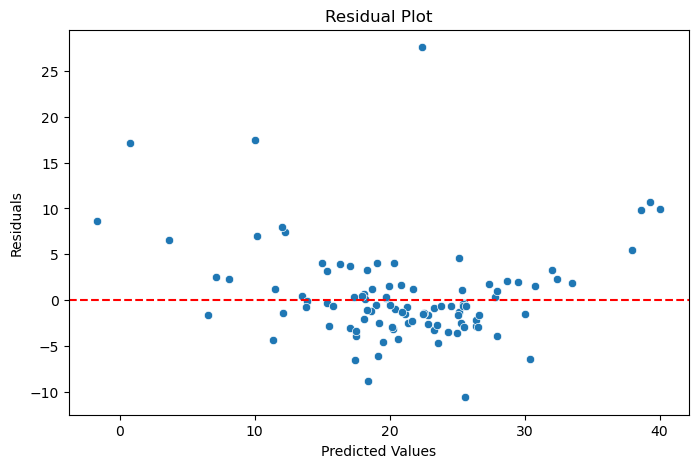

In [26]:
# Create residuals
residuals2 = y2_test - y2_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y2_pred, y=residuals2)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## POLYNOMIAL REGRESSION
['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX']

In [27]:
X = df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'NOX']]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
Input = [('scale', StandardScaler()), ('polynimaial', PolynomialFeatures(degree=3, include_bias=False)), ('model', LinearRegression())]

In [29]:
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

,steps,"[('scale', ...), ('polynimaial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,3
,interaction_only,False
,include_bias,False
,order,'C'


In [30]:
y_pipe_pred = pipe.predict(X_test)

In [31]:
mse3 = mean_squared_error(y_test, y_pipe_pred)
r2_3 = r2_score(y_test, y_pipe_pred)
print(f'Mean Squared Error: {mse3:.2f}')
print(f'R Squared: {r2_3:.2f}')

Mean Squared Error: 15.87
R Squared: 0.78


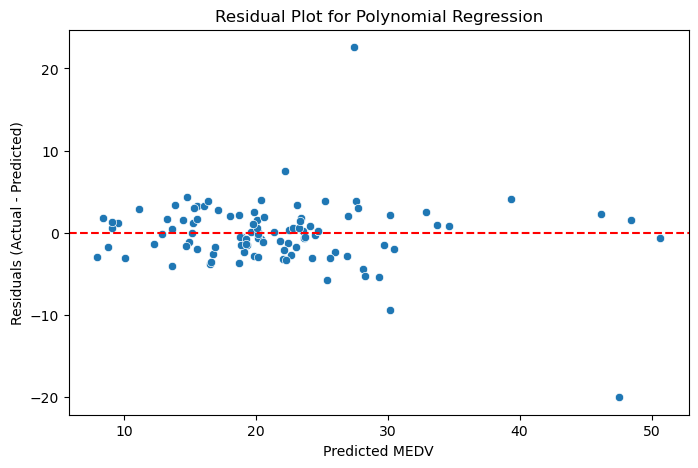

In [32]:
# Create residuals
residuals = y_test - y_pipe_pred

# Plot residuals vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pipe_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Polynomial Regression")
plt.show()
